In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel('Airlines+Data.xlsx')
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
data.shape

(96, 2)

In [5]:
data.nunique()

Month         96
Passengers    80
dtype: int64

In [6]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [8]:
data[data.duplicated()]

,Month,Passengers


In [9]:
data.rename(columns={'Month':'Date'},inplace=True)
data.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [10]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [11]:
d1=data.copy()
d1.set_index('Date',inplace=True)
d1.index.year


Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

###  Box plot

<Axes: xlabel='Year', ylabel='Passengers'>

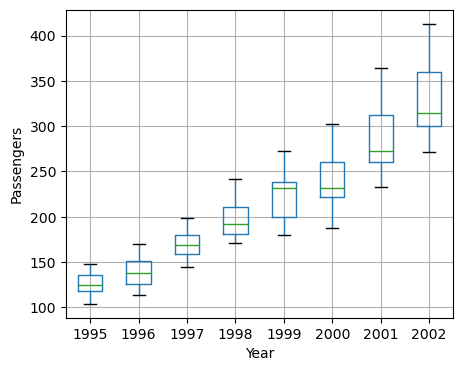

In [12]:
# create a boxplot of yearly data
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

groups = d1.groupby(Grouper(freq='A'))#annual - 1991 together 
years = DataFrame()
for name, group in groups:
    years[name.year] = list(group.values.flatten())
plt.figure(figsize=(5,4))
plt.xlabel('Year')
plt.ylabel('Passengers')
years.boxplot()


### Lag Plot

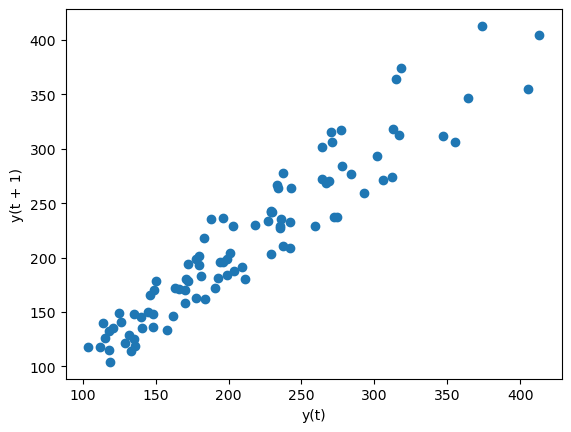

<Figure size 300x300 with 0 Axes>

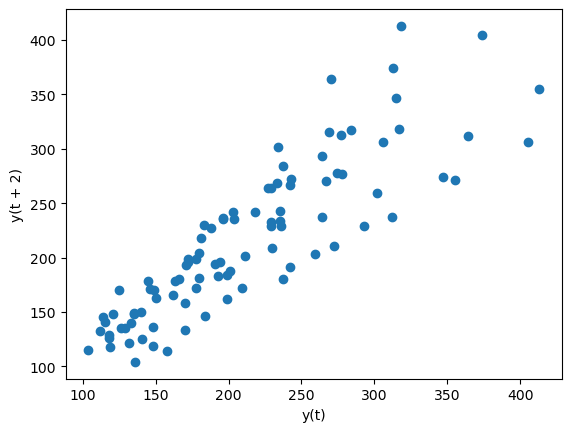

<Figure size 300x300 with 0 Axes>

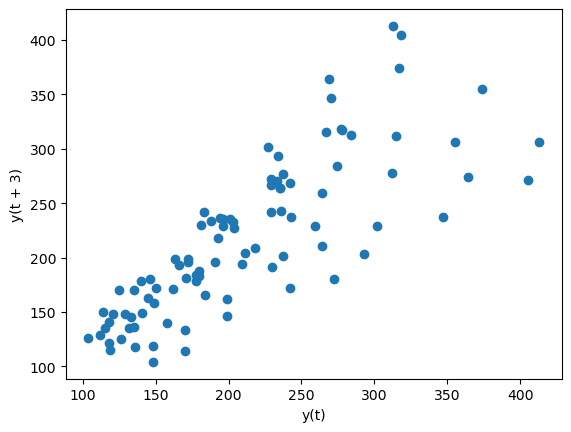

<Figure size 300x300 with 0 Axes>

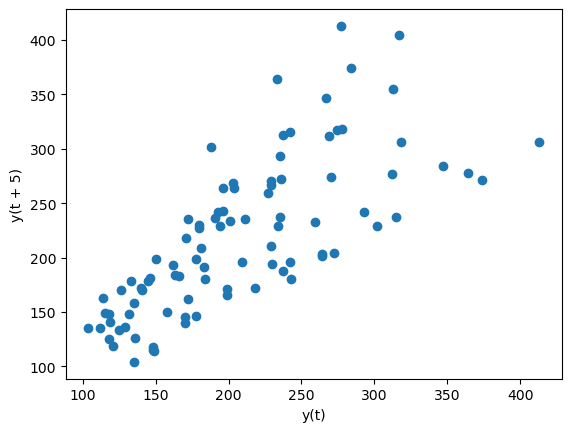

<Figure size 300x300 with 0 Axes>

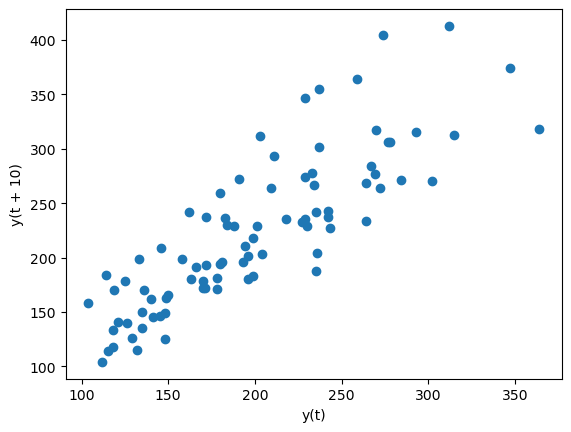

<Figure size 300x300 with 0 Axes>

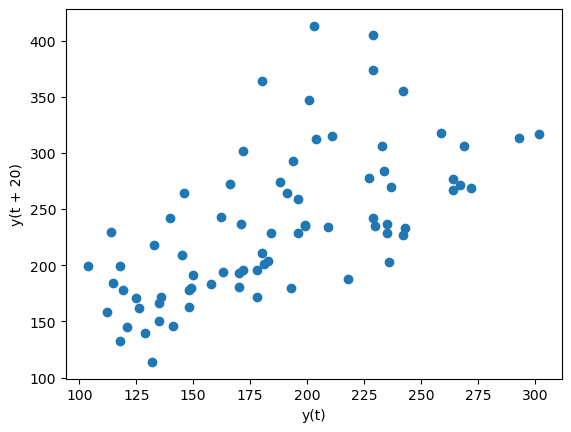

<Figure size 300x300 with 0 Axes>

In [13]:
from pandas.plotting import lag_plot
for i in (1,2,3,5,10,20):
    lag_plot(data.Passengers,lag=i)
    plt.figure(figsize=(3,3))
    pyplot.show()

<Axes: >

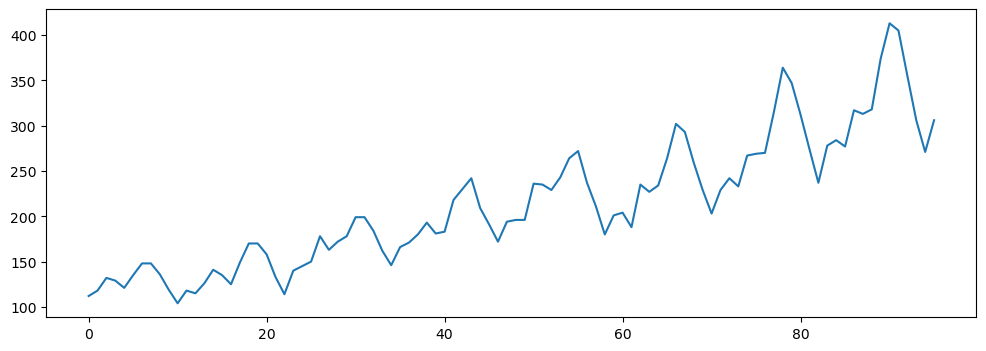

In [14]:
plt.figure(figsize=(12,4))

data.Passengers.plot()

> from the plot we can see there is increasing trend

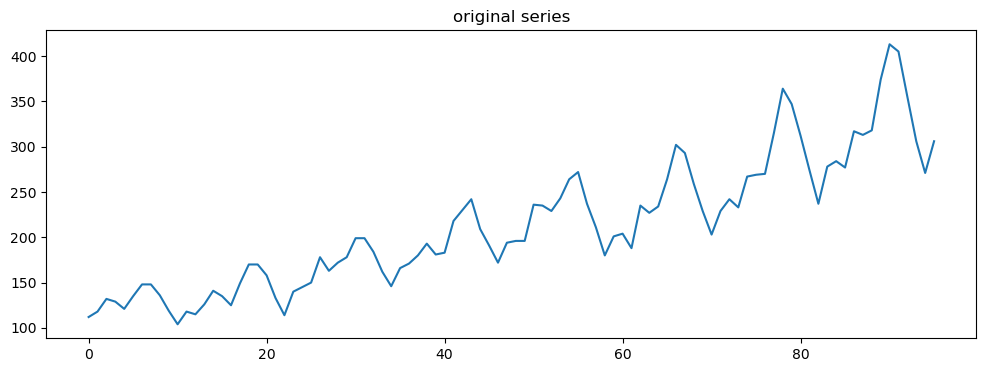

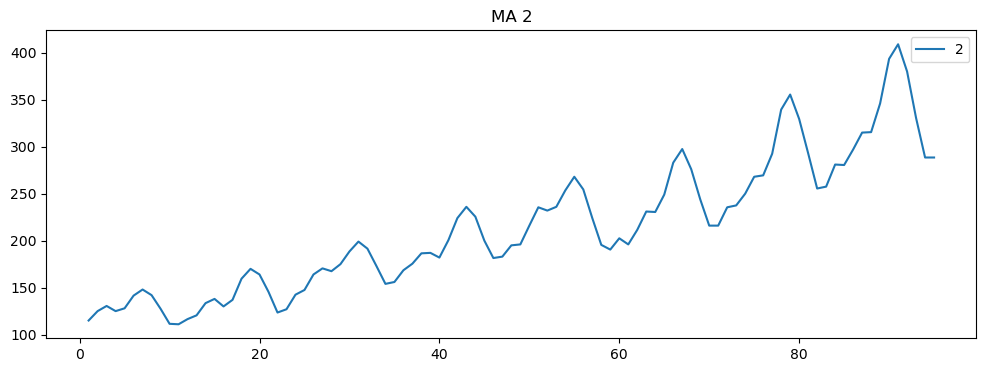

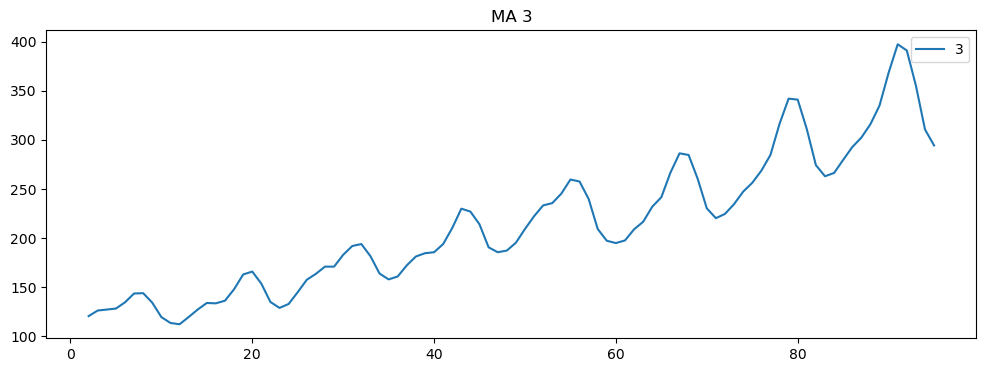

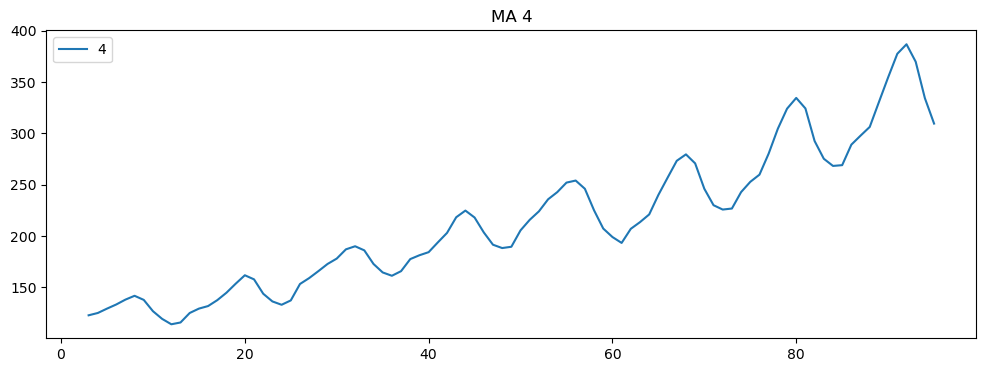

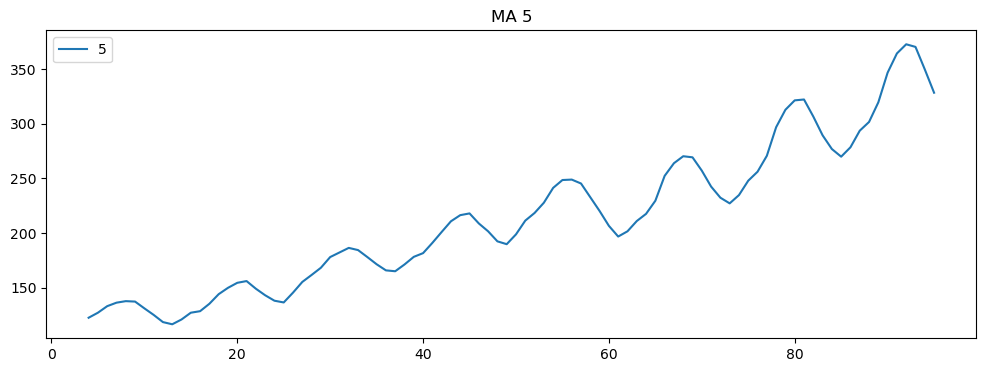

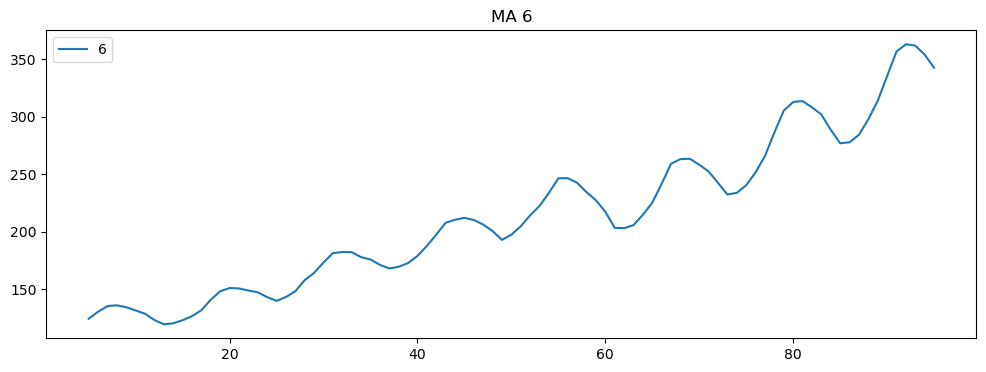

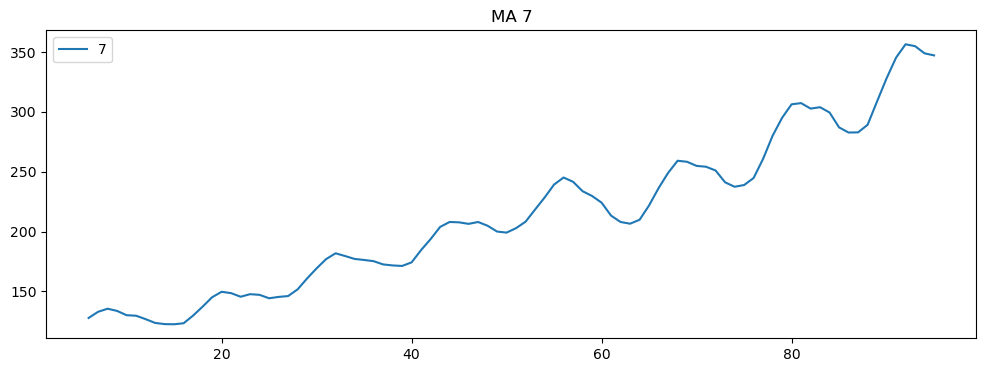

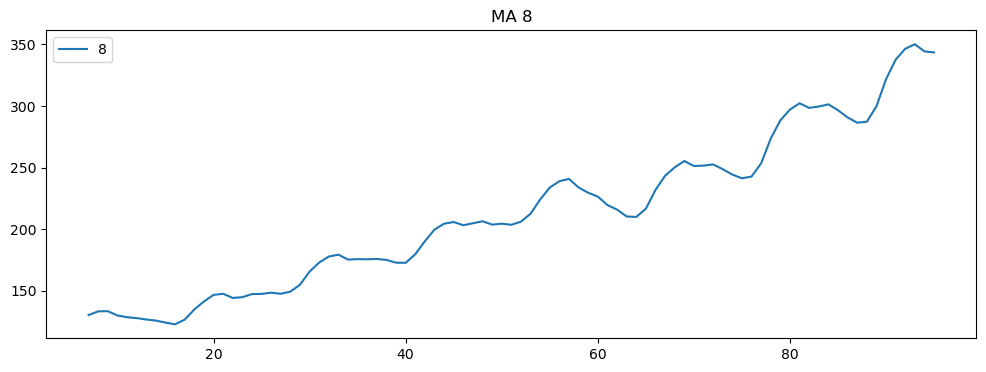

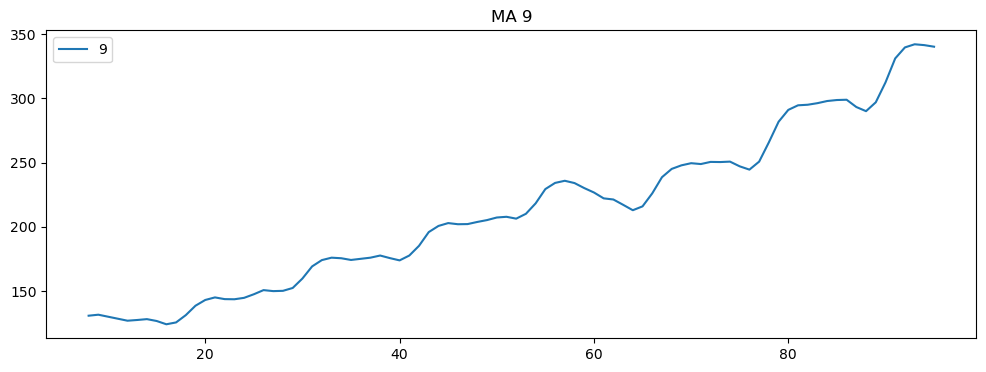

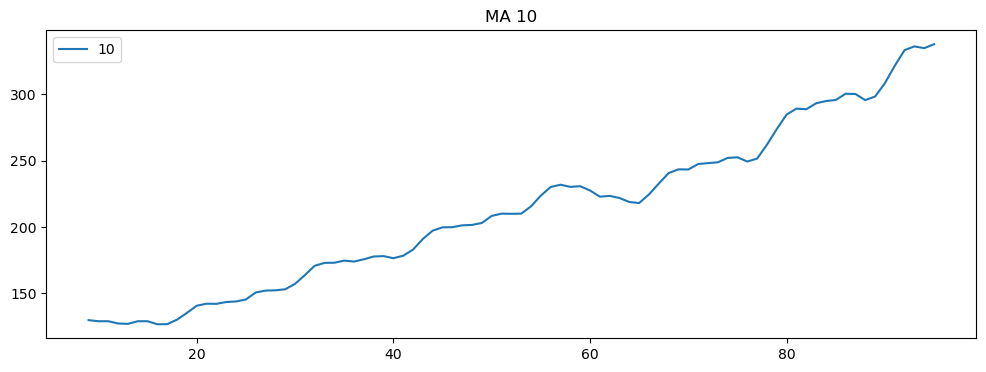

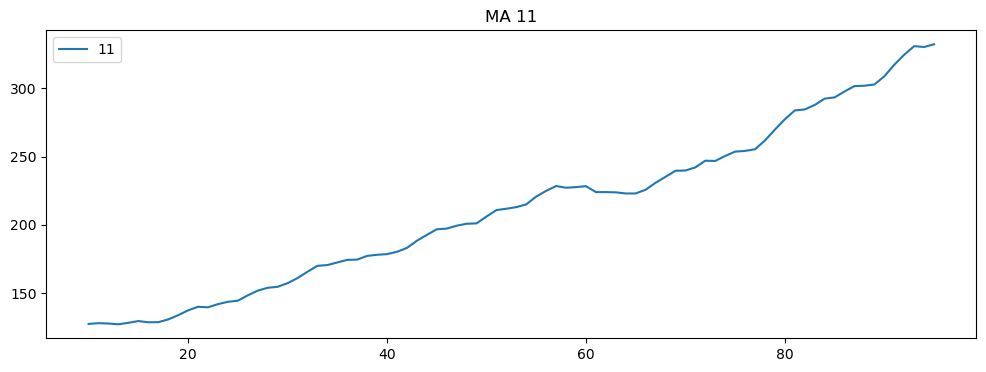

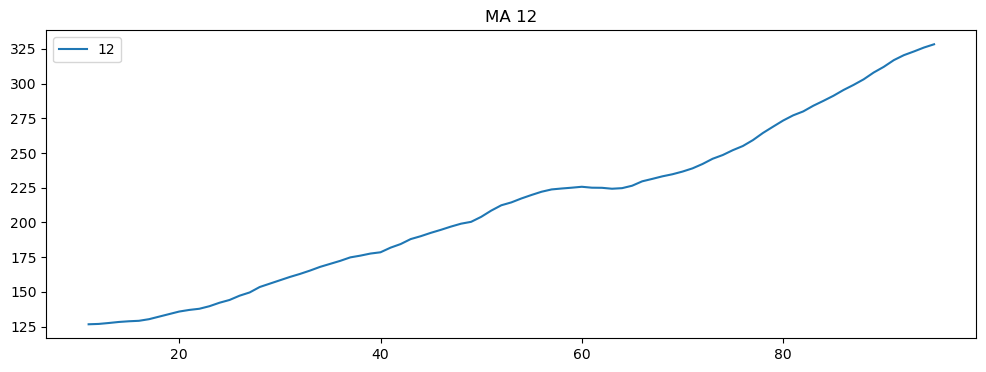

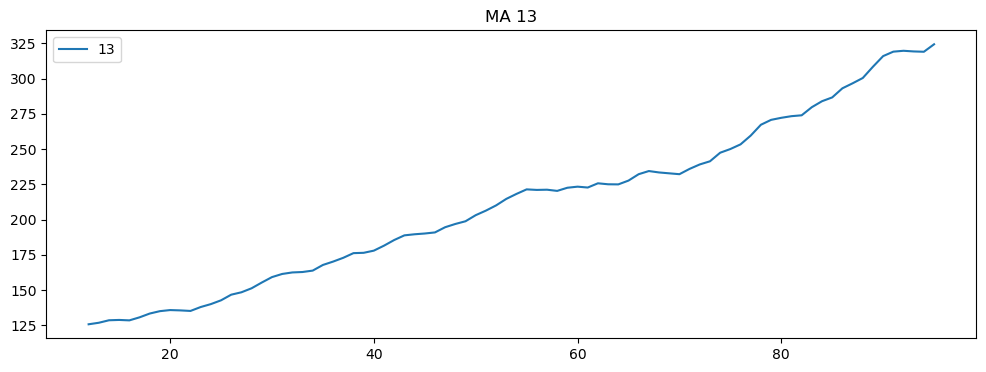

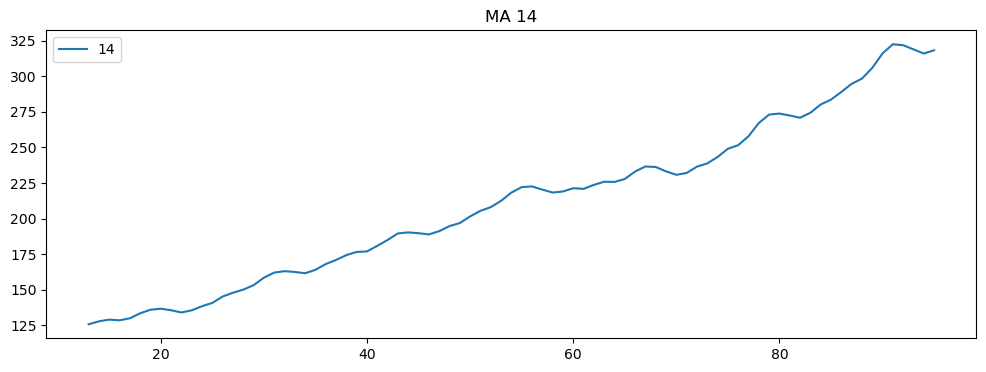

In [15]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
plt.title("original series")

for i in range(2,15):
    plt.figure(figsize=(12,4))


    data["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

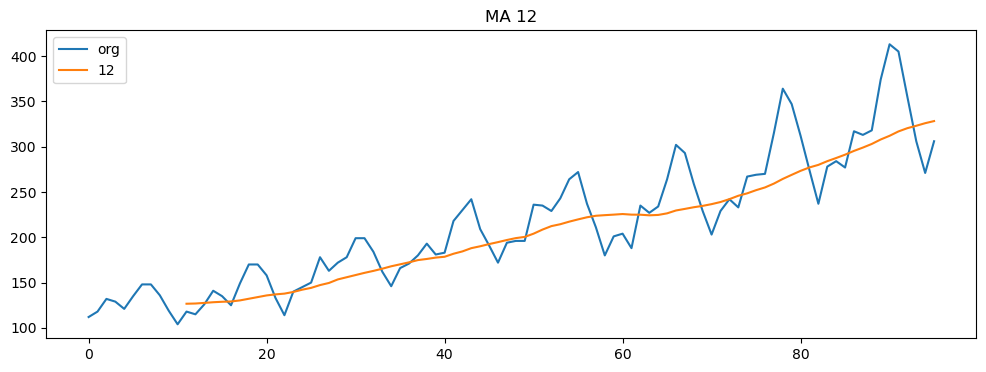

In [16]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
plt.title("original series")

data["Passengers"].rolling(12).mean().plot(label=str(12))
plt.title("MA "+str(12))

plt.legend(loc='best')

### Time series decomposition plot 

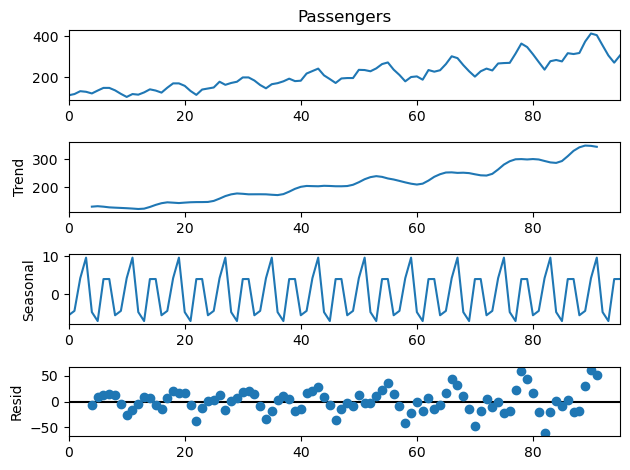

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data["Passengers"],period=8)
decompose_ts_add.plot()
plt.show()

<Figure size 500x400 with 0 Axes>

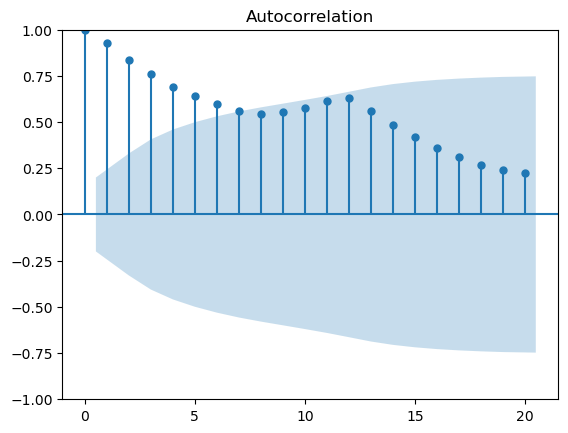

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots
plt.figure(figsize=(5,4))
tsa_plots.plot_acf(data.Passengers,lags=20)
plt.show()

>x-axis represents the lags and y represent the correlation coefficient. The plot shows at lag(1) is
strongest as it shows the correlation between the time series and its immediate previous value. 

In [19]:
data1=data.copy()
data1['Date'] = pd.to_datetime(data1['Date'], format='%Y-%m-%d')
data1['Date'] = pd.to_datetime(data1['Date'])
data1['Month'] = data1['Date'].dt.month
data1['Year'] = data1['Date'].dt.year
data1

,Date,Passengers,Month,Year
0,1995-01-01,112,1,1995
1,1995-02-01,118,2,1995
2,1995-03-01,132,3,1995
3,1995-04-01,129,4,1995
4,1995-05-01,121,5,1995
...,...,...,...,...
91,2002-08-01,405,8,2002
92,2002-09-01,355,9,2002
93,2002-10-01,306,10,2002
94,2002-11-01,271,11,2002


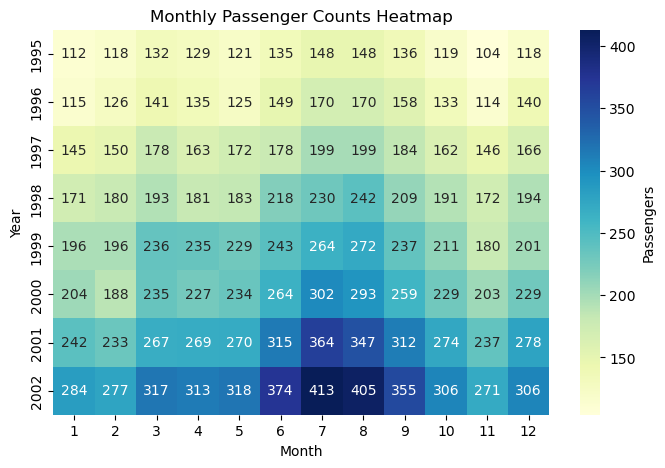

In [20]:
heatmap_data = data1.pivot_table(index='Year', columns='Month', values='Passengers', aggfunc='sum')
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', cbar_kws={'label': 'Passengers'})
plt.title('Monthly Passenger Counts Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

> we see that many people travel in the month of june july and august 

In [21]:
train = d1.head(76)
test = d1.tail(20)

### Simple Exponential Model 

In [22]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [98]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
se_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_se = se_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_se,test.Passengers) 

16.86197628836567

In [24]:
pred_se

2001-05-01    248.599061
2001-06-01    248.599061
2001-07-01    248.599061
2001-08-01    248.599061
2001-09-01    248.599061
2001-10-01    248.599061
2001-11-01    248.599061
2001-12-01    248.599061
2002-01-01    248.599061
2002-02-01    248.599061
2002-03-01    248.599061
2002-04-01    248.599061
2002-05-01    248.599061
2002-06-01    248.599061
2002-07-01    248.599061
2002-08-01    248.599061
2002-09-01    248.599061
2002-10-01    248.599061
2002-11-01    248.599061
2002-12-01    248.599061
Freq: MS, dtype: float64

In [99]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x :
    se_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=i)
    pred_se = se_model.predict(start = test.index[0],end = test.index[-1])
    score=MAPE(pred_se,test.Passengers) 
    print("smoothing_level ",i,"-->","MAPE Error",score)

smoothing_level  0.1 --> MAPE Error 19.8177999866017
smoothing_level  0.1473684210526316 --> MAPE Error 17.668489282282298
smoothing_level  0.19473684210526315 --> MAPE Error 16.916616938673815
smoothing_level  0.24210526315789474 --> MAPE Error 16.538606550737153
smoothing_level  0.2894736842105263 --> MAPE Error 16.35816416127961
smoothing_level  0.33684210526315794 --> MAPE Error 16.37558921231517
smoothing_level  0.38421052631578945 --> MAPE Error 16.35967087309816
smoothing_level  0.43157894736842106 --> MAPE Error 16.39961994203521
smoothing_level  0.4789473684210527 --> MAPE Error 16.394273112593677
smoothing_level  0.5263157894736842 --> MAPE Error 16.34903196275374
smoothing_level  0.5736842105263158 --> MAPE Error 16.273546345257145
smoothing_level  0.6210526315789474 --> MAPE Error 16.178402261645257
smoothing_level  0.6684210526315789 --> MAPE Error 16.073280546351945
smoothing_level  0.7157894736842105 --> MAPE Error 15.966078567717242
smoothing_level  0.7631578947368421 -

> The optimal value of alpha is 1--18.95

### Double Exponential (Holt method)

In [100]:
de_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_de = de_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_de,test.Passengers) 

17.73711191597716

In [27]:
pred_de

2001-05-01    273.284510
2001-06-01    278.444501
2001-07-01    283.604493
2001-08-01    288.764484
2001-09-01    293.924476
2001-10-01    299.084468
2001-11-01    304.244459
2001-12-01    309.404451
2002-01-01    314.564442
2002-02-01    319.724434
2002-03-01    324.884425
2002-04-01    330.044417
2002-05-01    335.204409
2002-06-01    340.364400
2002-07-01    345.524392
2002-08-01    350.684383
2002-09-01    355.844375
2002-10-01    361.004366
2002-11-01    366.164358
2002-12-01    371.324350
Freq: MS, dtype: float64

In [101]:
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        de_model = Holt(train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
        pred_de = de_model.predict(start = test.index[0],end = test.index[-1])
        score=MAPE(pred_de,test.Passengers)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 13.77304143743898
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 13.813076510128397
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 13.656324949481606
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 13.710286634618399
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 13.694380352387991
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 14.158436993981335
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 16.01096318461912
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 18.367617180054097
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 20.680121252104566
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 22.758220817833177
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 13.807358339653138
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 14.116585766283311
smoothing_level  0.19  smoothing_sl

In [29]:
double_exp=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
double_exp.sort_values(["score"])
double_exp.head()

,smoothing_level,smoothing_slope,score
0,0.1,0.10,18.470538
1,0.1,0.19,20.537285
2,0.1,0.28,19.430893
3,0.1,0.37,18.196008
4,0.1,0.46,16.666096


> the best alpha value is 0.1 and beta value is 0.10 for which the error is minimum

### Holts winter exponential smoothing

In [30]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",
                                         trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers) 

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


9.960293680915447

In [102]:
hwe_model_add_add = ExponentialSmoothing(d1["Passengers"],seasonal="add",
                                         trend="add",seasonal_periods=12).fit()

In [32]:
hwe_model_add_add.forecast(10) 

2003-01-01    319.235250
2003-02-01    311.528363
2003-03-01    350.278666
2003-04-01    346.984953
2003-05-01    351.844997
2003-06-01    403.925669
2003-07-01    440.566746
2003-08-01    427.446408
2003-09-01    376.628091
2003-10-01    329.767424
Freq: MS, dtype: float64

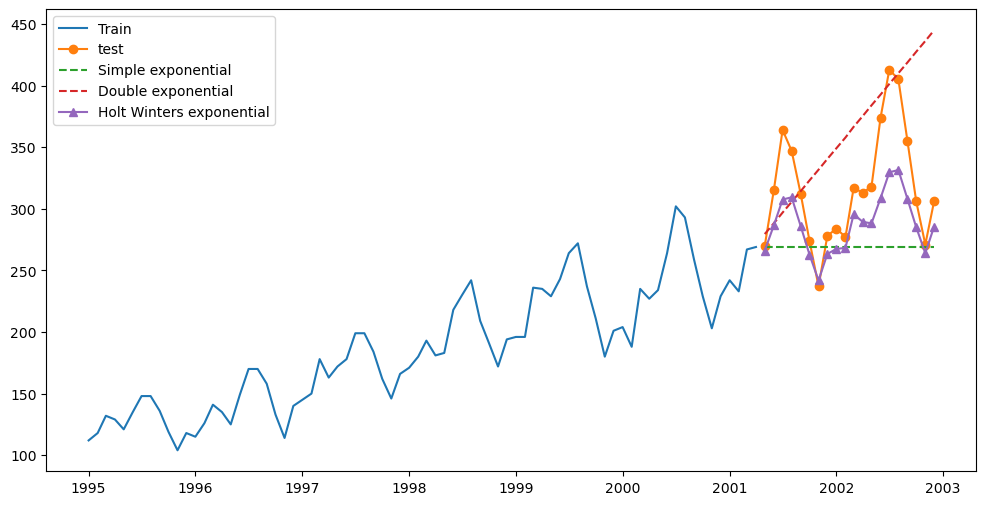

In [33]:
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='test',linestyle='-', marker='o')
plt.plot(pred_se, label='Simple exponential',linestyle='--')
plt.plot(pred_de, label='Double exponential',linestyle='--')
plt.plot(pred_hwe_add_add, label='Holt Winters exponential',linestyle='-',marker='^')
plt.legend(loc='best')
plt.show()

### ARIMA Model

In [34]:
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import statsmodels

In [40]:
d1

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


<Figure size 500x300 with 0 Axes>

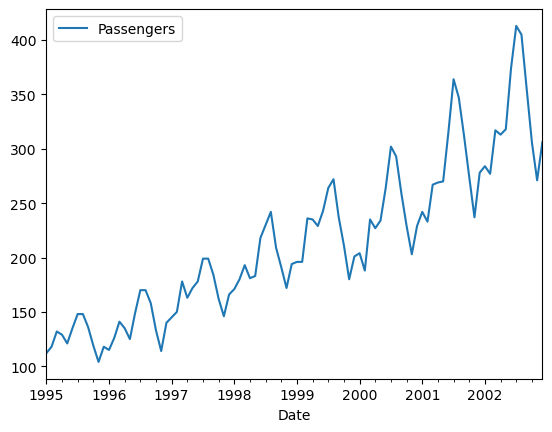

In [35]:
plt.figure(figsize=(5,3))
d1.plot()
pyplot.show()

In [36]:
split_point = len(d1) - 10
dataset, validation = d1[0:split_point], d1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=True)
validation.to_csv('validation.csv', header=False)

Dataset 86, Validation 10


In [45]:
#Hyperparameters

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p=2,d=4,q=3) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train] # all the training data will be strored inside a list
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [46]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e :
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [47]:
# load dataset
train = pd.read_csv('dataset.csv', index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=91.615
ARIMA(0, 0, 1) RMSE=50.073
ARIMA(0, 0, 2) RMSE=36.770
ARIMA(0, 0, 3) RMSE=28.952
ARIMA(0, 0, 4) RMSE=27.829
ARIMA(0, 1, 0) RMSE=29.191
ARIMA(0, 1, 1) RMSE=27.661
ARIMA(0, 1, 2) RMSE=27.624
ARIMA(0, 1, 3) RMSE=27.354
ARIMA(0, 1, 4) RMSE=24.219
ARIMA(0, 2, 0) RMSE=34.163
ARIMA(0, 2, 1) RMSE=29.545
ARIMA(0, 2, 2) RMSE=27.946
ARIMA(0, 2, 3) RMSE=28.107
ARIMA(0, 2, 4) RMSE=25.379
ARIMA(0, 3, 0) RMSE=52.174
ARIMA(0, 3, 1) RMSE=34.389
ARIMA(0, 3, 2) RMSE=30.024
ARIMA(0, 3, 3) RMSE=28.258
ARIMA(0, 3, 4) RMSE=28.637
ARIMA(0, 4, 0) RMSE=89.582
ARIMA(0, 4, 1) RMSE=52.544
ARIMA(0, 4, 2) RMSE=34.931
ARIMA(0, 4, 3) RMSE=30.912
ARIMA(0, 4, 4) RMSE=33.717
ARIMA(1, 0, 0) RMSE=29.175
ARIMA(1, 0, 1) RMSE=27.217
ARIMA(1, 0, 2) RMSE=27.507
ARIMA(1, 0, 3) RMSE=29.159
ARIMA(1, 0, 4) RMSE=25.446
ARIMA(1, 1, 0) RMSE=28.415
ARIMA(1, 1, 1) RMSE=27.120
ARIMA(1, 1, 2) RMSE=25.667
ARIMA(1, 1, 3) RMSE=25.920
ARIMA(1, 1, 4) RMSE=24.725
ARIMA(1, 2, 0) RMSE=34.926
ARIMA(1, 2, 1) RMSE=28.738
A

### Build Model based on the optimized values

In [82]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [83]:
train = pd.read_csv('dataset.csv', index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [84]:
train

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-10-01,274
2001-11-01,237
2001-12-01,278


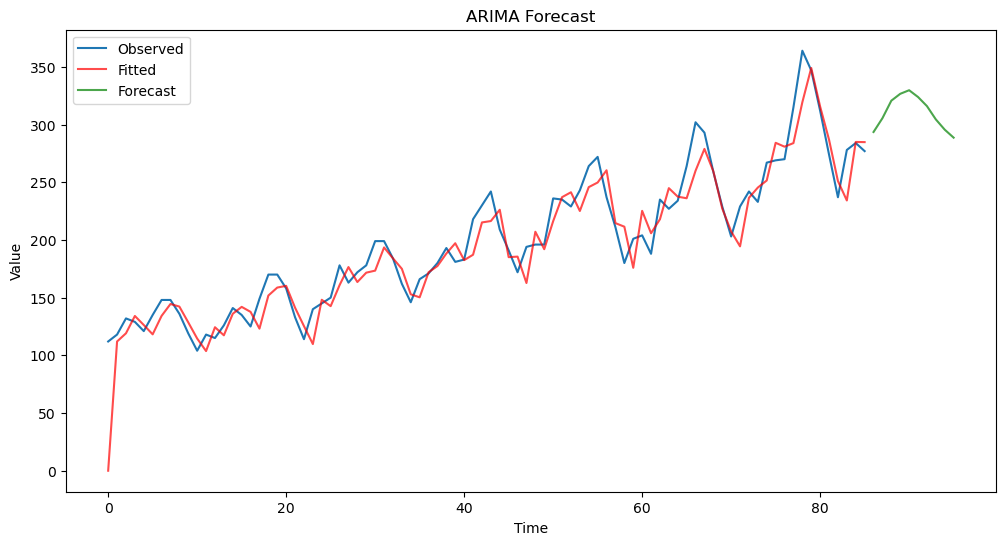

In [87]:
model = ARIMA(X, order=(3, 1, 3))
model_fit = model.fit()

# Make a 10-step ahead forecast
forecast = model_fit.forecast(steps=10)

# Plot the observed data and fitted values
plt.figure(figsize=(12, 6))
plt.plot(X, label='Observed')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted', alpha=0.7)
plt.legend(loc='best')

# Plot the forecasted values
forecast_index = np.arange(len(X), len(X) + len(forecast))
plt.plot(forecast_index, forecast, color='green', label='Forecast', alpha=0.7)

plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
